<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/RNN/LSTM_Recorrent_Neural_Network_sin_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
'''
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
'''

'\nfrom tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import SGD, Adam\n'

In [4]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [5]:
num = 200
series = np.sin(0.1*np.arange(num)+0.1*np.random.randn(num))

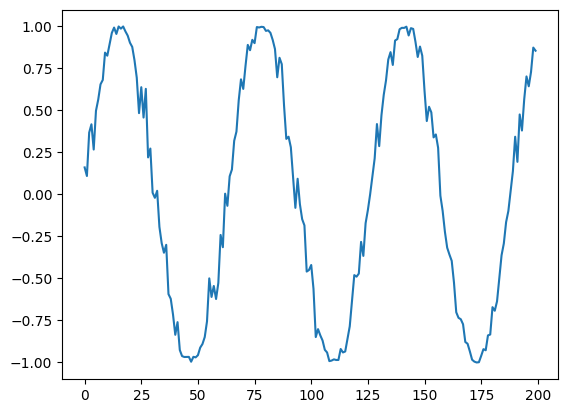

In [6]:
plt.plot(series)

In [7]:
P = 10 # period
D = 1
X = []
Y = []

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (190, 10, 1) output shape (190,)


In [8]:
X[0]

array([[0.16116323],
       [0.11013479],
       [0.36823627],
       [0.41787414],
       [0.26755589],
       [0.49814199],
       [0.56517003],
       [0.65552653],
       [0.68187639],
       [0.84438788]])

In [9]:
N, cols, other = X.shape
X_train = X[:-N//2]
Y_train = Y[:-N//2]
X_test = X[-N//2:]
Y_test = Y[-N//2:]

In [10]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(5,'relu'))

# Add a Dense layer with 1 units.
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
3/3 [==============================] - 8s 539ms/step - loss: 0.5387 - val_loss: 0.3875
Epoch 2/100
3/3 [==============================] - 0s 133ms/step - loss: 0.2230 - val_loss: 0.2256
Epoch 3/100
3/3 [==============================] - 0s 141ms/step - loss: 0.2144 - val_loss: 0.0756
Epoch 4/100
3/3 [==============================] - 0s 115ms/step - loss: 0.1194 - val_loss: 0.1101
Epoch 5/100
3/3 [==============================] - 0s 146ms/step - loss: 0.0889 - val_loss: 0.0580
Epoch 6/100
3/3 [==============================] - 0s 138ms/step - loss: 0.0766 - val_loss: 0.0353
Epoch 7/100
3/3 [==============================] - 0s 153ms/step - loss: 0.0509 - val_loss: 0.0491
Epoch 8/100
3/3 [==============================] - 0s 79ms/step - loss: 0.0395 - val_loss: 0.0211
Epoch 9/100
3/3 [==============================] - 0s 136ms/step - loss: 0.0328 - val_loss: 0.0180
Epoch 10/100
3/3 [==============================] - 0s 111ms/step - loss: 0.0298 - val_loss: 0.0226
Epoch 11/1

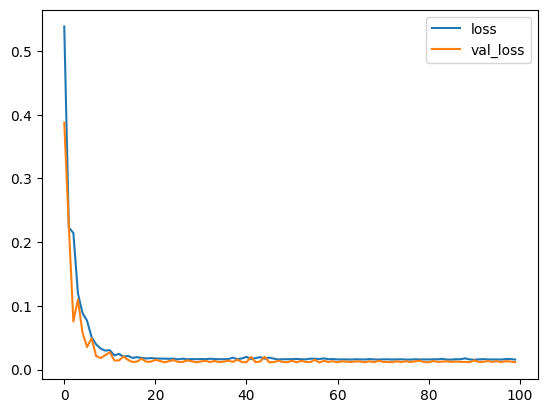

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

3/3 [==============================] - 0s 6ms/step


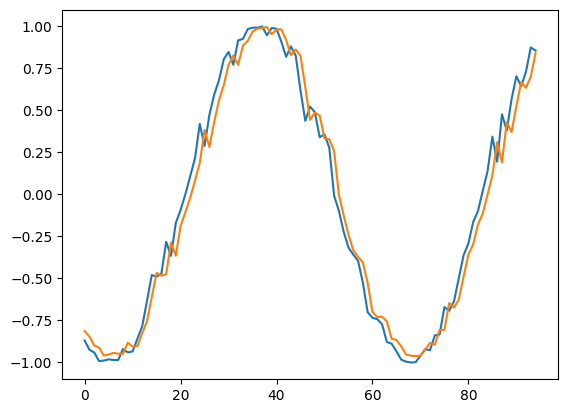

In [14]:
# this is a wrong way to do....
pred_Y = model.predict(X_test)
plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [15]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

1/1 [==============================] - 0s 20ms/step


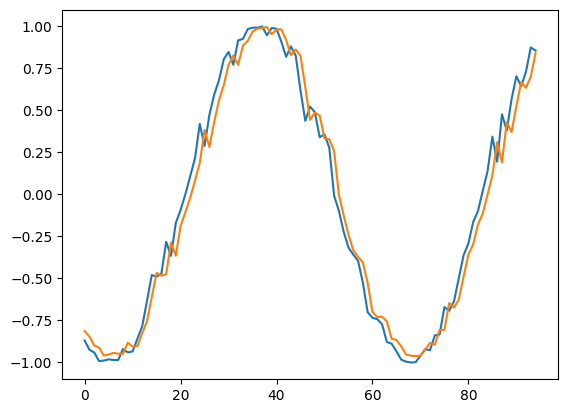

In [16]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [17]:
a,b = model.layers[1].get_weights()
print(a.shape,b.shape)

(5, 1) (1,)


In [18]:
print(a)
print('===============')
print(b)

[[ 0.39161012]
 [-1.3034226 ]
 [ 0.26153627]
 [ 0.15423007]
 [-0.18924326]]
[1.0923711]
